In [61]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from numpy import mean
from numpy import absolute
from numpy import sqrt
%matplotlib inline
import os
os.getcwd()

'/Users/kioshi/Desktop/Me/Python/Projects/Mobile Cellular Subsciptions 2021'

In [62]:
#Load csv file into pandas
mobile_cell_subs = pd.read_csv('mobile cellular data.csv')
print(mobile_cell_subs)

     Country Name Country Code                 Indicator Name Indicator Code  \
0           Aruba          ABW  Mobile cellular subscriptions    IT.CEL.SETS   
1     Afghanistan          AFG  Mobile cellular subscriptions    IT.CEL.SETS   
2          Angola          AGO  Mobile cellular subscriptions    IT.CEL.SETS   
3         Albania          ALB  Mobile cellular subscriptions    IT.CEL.SETS   
4         Andorra          AND  Mobile cellular subscriptions    IT.CEL.SETS   
..            ...          ...                            ...            ...   
259        Kosovo          XKX  Mobile cellular subscriptions    IT.CEL.SETS   
260   Yemen, Rep.          YEM  Mobile cellular subscriptions    IT.CEL.SETS   
261  South Africa          ZAF  Mobile cellular subscriptions    IT.CEL.SETS   
262        Zambia          ZMB  Mobile cellular subscriptions    IT.CEL.SETS   
263      Zimbabwe          ZWE  Mobile cellular subscriptions    IT.CEL.SETS   

     1960  1961  1962  1963  1964  1965

In [63]:
#Clean data by dropping unnecessary columns: 'Country Code', 'Indicator Name', 'Indicator Code'
mobile_cell_subs.drop(['Country Code', 'Indicator Name', 'Indicator Code'],axis = 1,  inplace = True)

In [64]:
#Find all year columns with NaN values
mob_cell_subs_na = mobile_cell_subs.isna().any()
print(mob_cell_subs_na.to_string())

Country Name    False
1960             True
1961             True
1962             True
1963             True
1964             True
1965             True
1966             True
1967             True
1968             True
1969             True
1970             True
1971             True
1972             True
1973             True
1974             True
1975             True
1976             True
1977             True
1978             True
1979             True
1980             True
1981             True
1982             True
1983             True
1984             True
1985             True
1986             True
1987             True
1988             True
1989             True
1990             True
1991             True
1992             True
1993             True
1994             True
1995             True
1996             True
1997             True
1998             True
1999             True
2000             True
2001             True
2002             True
2003             True
2004      

In [65]:
#Show columns without continuous '0' & 'NaN' values to see when mobile cell subscriptions started
mob_cell_subs_zero = mobile_cell_subs.replace([0, 'NA'], np.nan).apply(lambda x: any(~x.isnull()))
mobile_cell_subs.loc[:,mob_cell_subs_zero]

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,1718.0,3000.0,3402.0,5380.0,12000.0,15000.0,53000.0,61800.0,69952.0,98389.0,103417.0,109030.0,113586.0,120806.0,128000.0,131800.0,131800.0,135000.0,138800.0,139700.0,141000.0,141000.0,141000.0,141000.0,141000.0
1,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,200000.0,600000.0,1200000.0,2520370.0,4668100.0,7898910.0,10500000.0,10215800.0,13797900.0,15340100.0,16807200.0,18407200.0,19709000.0,21603000.0,23929700.0,21976400.0,22580100.0
2,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100.0,1824.0,1994.0,3298.0,7052.0,9820.0,24000.0,25806.0,75000.0,140000.0,350000.0,740000.0,1611120.0,3054620.0,4961540.0,6773360.0,8109420.0,9403370.0,12073200.0,12785100.0,13285200.0,14052600.0,13884500.0,13001100.0,13324000.0,13288400.0,14830200.0
3,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2300.0,3300.0,5600.0,11008.0,29791.0,392650.0,851000.0,1100000.0,1259590.0,1530240.0,1909890.0,2322440.0,1859630.0,2463740.0,2692370.0,3100000.0,3500000.0,3685980.0,3359650.0,3400960.0,3369760.0,3625700.0,2714880.0,2630080.0
4,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,780.0,784.0,2825.0,5488.0,8618.0,14117.0,20600.0,23543.0,29429.0,32790.0,51893.0,58366.0,64560.0,69004.0,63503.0,64202.0,64549.0,65495.0,65044.0,63865.0,63931.0,66241.0,71336.0,76132.0,80337.0,82614.0,87909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,NaN,NaN,NaN,562000.0
260,"Yemen, Rep.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1550.0,5170.0,8191.0,8250.0,8810.0,12245.0,16146.0,27677.0,32042.0,147837.0,486667.0,675162.0,1476000.0,2277560.0,2977780.0,4349000.0,6445000.0,8313000.0,11085000.0,11668000.0,13900000.0,16844700.0,17100000.0,15022000.0,16433100.0,15357900.0,15357900.0,15357900.0
261,South Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3980.0,5680.0,7100.0,12510.0,40000.0,340000.0,535000.0,953000.0,1836000.0,3337000.0,5188000.0,8339000.0,10787000.0,13702000.0,16860000.0,20839000.0,33960000.0,39662000.0,42300000.0,45000000.0,46436000.0,50372000.0,64000000.0,68394000.0,76865300.0,79280700.0,87999500.0,82412900.0,88497600.0,88567000.0,96972500.0
262,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1547.0,2721.0,4550.0,8260.0,28190.0,98853.0,121200.0,139092.0,241000.0,464354.0,949559.0,1663330.0,2639030.0,3539000.0,4406680.0,5446990.0,8164550.0,10524700.0,10395800.0,10114900.0,11557700.0,12017000.0,13438500.0,15470300.0,17220600.0


In [66]:
#Drop columns with continuous '0' and 'NaN values
mobile_cell_subs.drop(mobile_cell_subs.iloc[:, 1:21], axis=1, inplace=True)

In [67]:
#Rename 'Country Name' column to 'Country'
mobile_cell_subs = mobile_cell_subs.rename(columns={'Country Name': 'Country'})

In [68]:
#Merge year columns into one year columns and place values into another column
mobile_cell_subs_merge = mobile_cell_subs.melt(id_vars=['Country'], var_name='year', value_name='total_subscribers')

In [69]:
#Drop NaNs from 'total_subscriber' column to plot scatter plot
mobile_cell_subs_merge = mobile_cell_subs_merge[mobile_cell_subs_merge['total_subscribers'].notnull()]
print(mobile_cell_subs_merge)

            Country  year  total_subscribers
0             Aruba  1980                0.0
1       Afghanistan  1980                0.0
2            Angola  1980                0.0
3           Albania  1980                0.0
4           Andorra  1980                0.0
...             ...   ...                ...
10555        Kosovo  2019           562000.0
10556   Yemen, Rep.  2019         15357900.0
10557  South Africa  2019         96972500.0
10558        Zambia  2019         17220600.0
10559      Zimbabwe  2019         13195900.0

[10080 rows x 3 columns]


In [70]:
X5 = mobile_cell_subs_merge[mobile_cell_subs_merge['year'].astype(int)>1993]
X5

,Country,year,total_subscribers
3696,Aruba,1994,20.0
3697,Afghanistan,1994,0.0
3698,Angola,1994,1824.0
3699,Albania,1994,0.0
3700,Andorra,1994,784.0
...,...,...,...
10555,Kosovo,2019,562000.0
10556,"Yemen, Rep.",2019,15357900.0
10557,South Africa,2019,96972500.0
10558,Zambia,2019,17220600.0


<AxesSubplot:xlabel='year', ylabel='total_subscribers'>

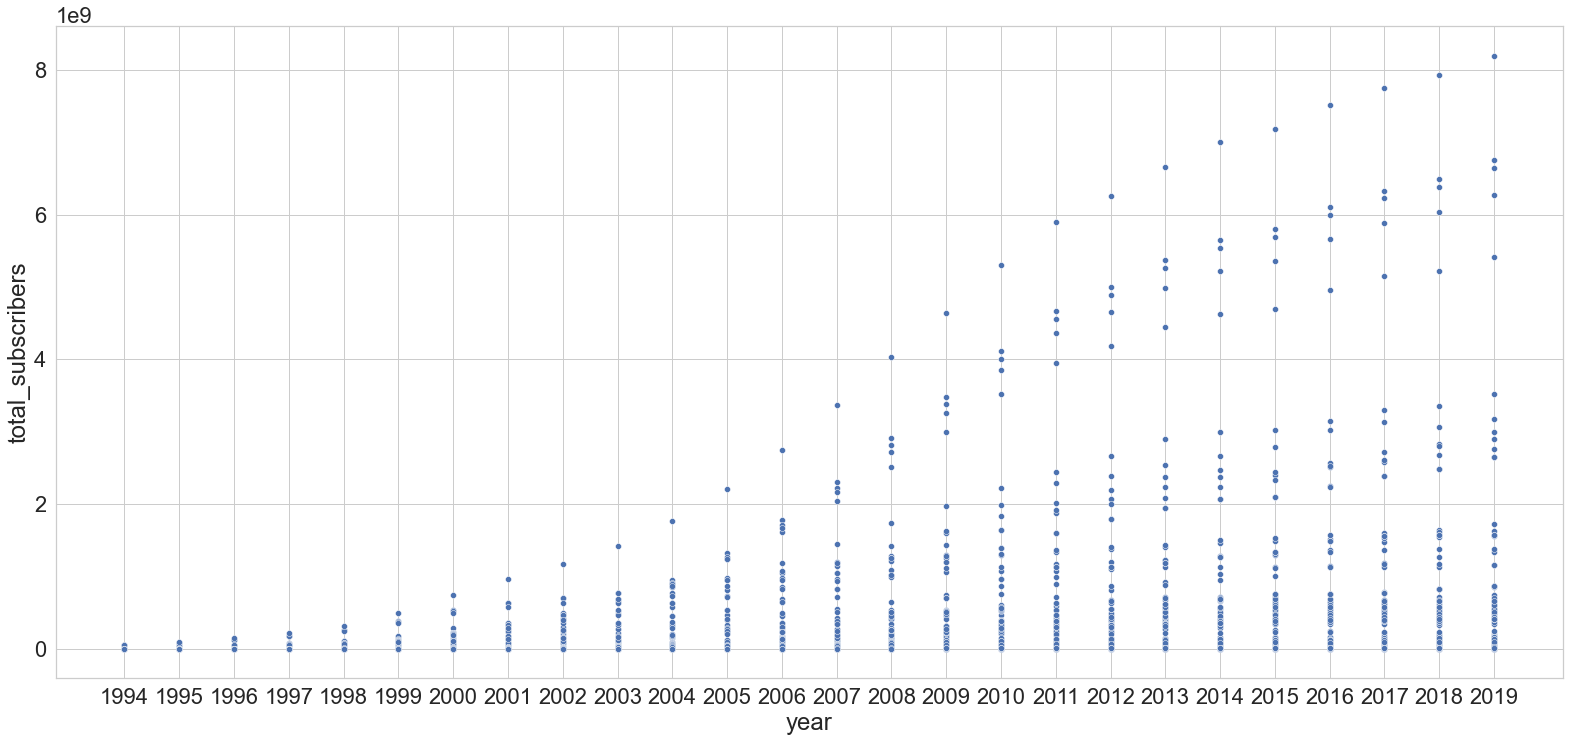

In [71]:
plt.figure(figsize=(27, 12))
sns.set_style('whitegrid')
sns.scatterplot(x=X5['year'], y=X5['total_subscribers'])


#sns.catplot(x = 'Country', y = 'year', hue='total_subscribers', data = X5)

In [72]:
#Slice Japan from index
jpn_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Japan'])]

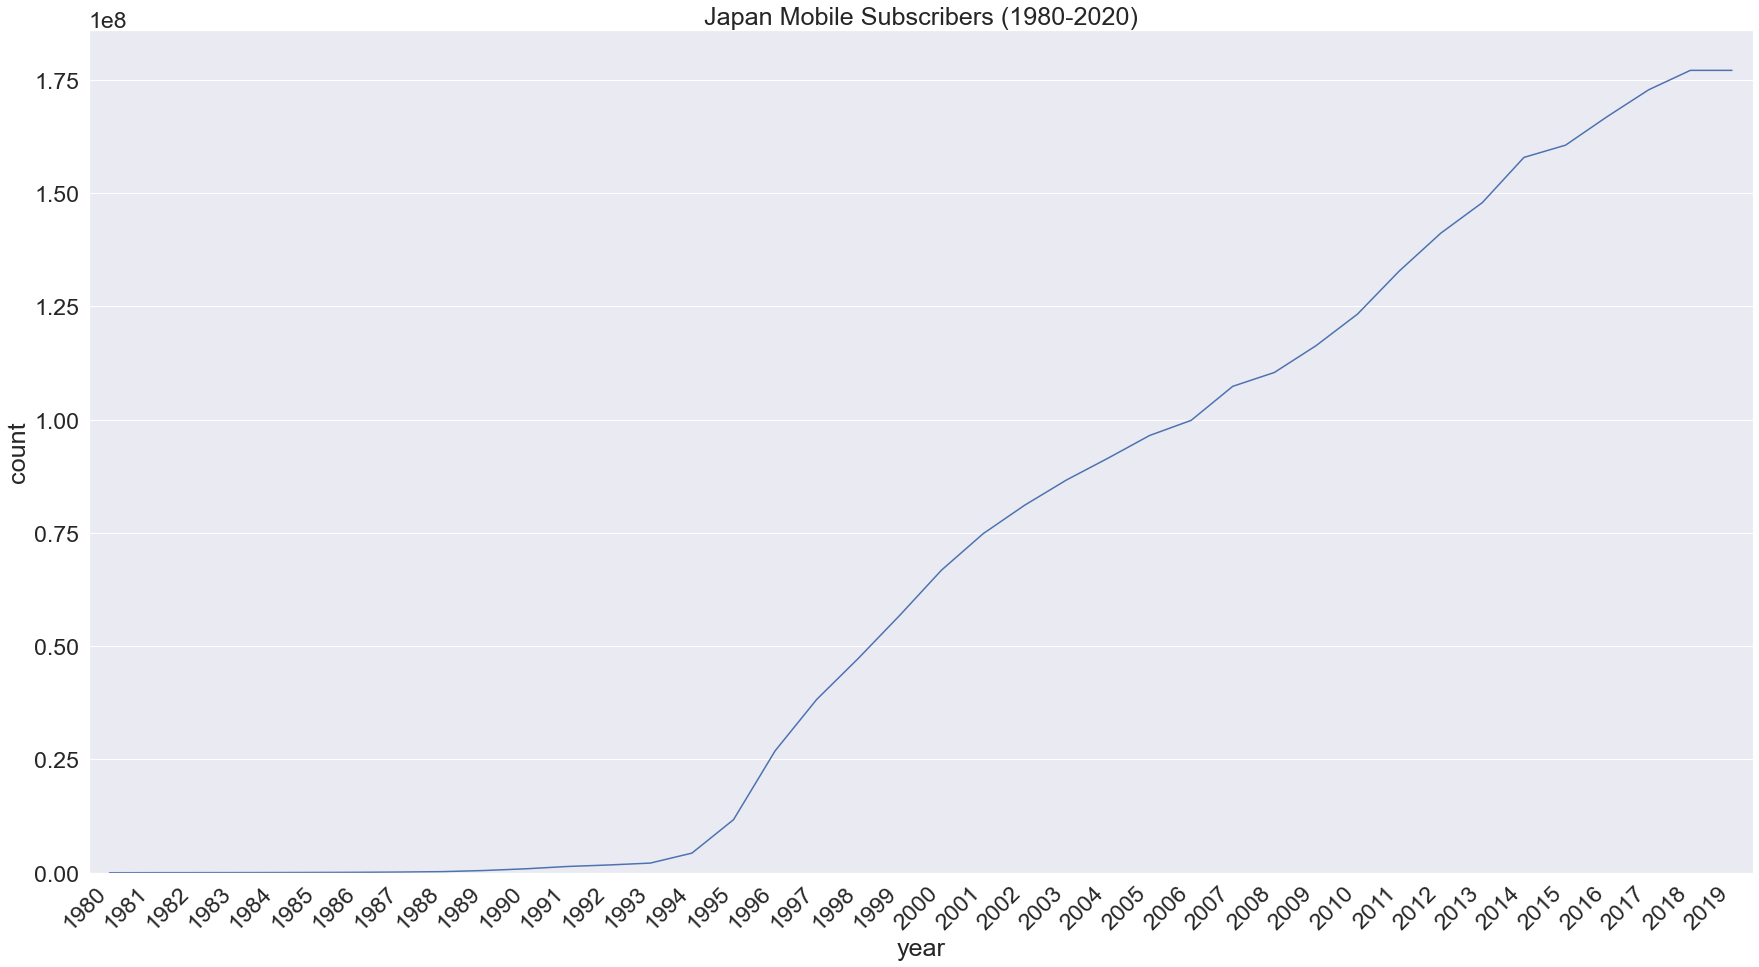

In [73]:
#Plot using Seaborn to see any outliers/anomolies
plt.figure(figsize=(25, 14))
sns.set_style('darkgrid')
sns.set(font_scale = 2.1)
plt.subplots_adjust(hspace = 1.5)
jpn_subs_chart = sns.lineplot(x='year', y='total_subscribers', data=jpn_mob_cell_subs).set_title('Japan Mobile Subscribers (1980-2020)')
ax = sns.countplot(x='year', data=jpn_mob_cell_subs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [74]:
#Confirm line plot flattening at the end (duplicate value for '2019')
print(jpn_mob_cell_subs)

      Country  year  total_subscribers
117     Japan  1980                0.0
381     Japan  1981            13275.0
645     Japan  1982            19804.0
909     Japan  1983            27198.0
1173    Japan  1984            40392.0
1437    Japan  1985            61800.0
1701    Japan  1986            95131.0
1965    Japan  1987           150773.0
2229    Japan  1988           242888.0
2493    Japan  1989           489558.0
2757    Japan  1990           868078.0
3021    Japan  1991          1378110.0
3285    Japan  1992          1712550.0
3549    Japan  1993          2131370.0
3813    Japan  1994          4331370.0
4077    Japan  1995         11712100.0
4341    Japan  1996         26906500.0
4605    Japan  1997         38253900.0
4869    Japan  1998         47307600.0
5133    Japan  1999         56845600.0
5397    Japan  2000         66784400.0
5661    Japan  2001         74819200.0
5925    Japan  2002         81118300.0
6189    Japan  2003         86655000.0
6453    Japan  2004      

In [75]:
#Remove '2019' & '2020' column for data modeling
jpn_mob_cell_subs_na = jpn_mob_cell_subs[jpn_mob_cell_subs['total_subscribers'].notnull()]

In [76]:
#Drop duplicate value from '2019'
jpn_mob_cell_subs_80_18 = jpn_mob_cell_subs_na.drop_duplicates(subset=['total_subscribers'], keep='first')
print(jpn_mob_cell_subs_80_18)

      Country  year  total_subscribers
117     Japan  1980                0.0
381     Japan  1981            13275.0
645     Japan  1982            19804.0
909     Japan  1983            27198.0
1173    Japan  1984            40392.0
1437    Japan  1985            61800.0
1701    Japan  1986            95131.0
1965    Japan  1987           150773.0
2229    Japan  1988           242888.0
2493    Japan  1989           489558.0
2757    Japan  1990           868078.0
3021    Japan  1991          1378110.0
3285    Japan  1992          1712550.0
3549    Japan  1993          2131370.0
3813    Japan  1994          4331370.0
4077    Japan  1995         11712100.0
4341    Japan  1996         26906500.0
4605    Japan  1997         38253900.0
4869    Japan  1998         47307600.0
5133    Japan  1999         56845600.0
5397    Japan  2000         66784400.0
5661    Japan  2001         74819200.0
5925    Japan  2002         81118300.0
6189    Japan  2003         86655000.0
6453    Japan  2004      

In [77]:
#Get percentage change for 'total_subscribers' column
jpn_mob_cell_subs_80_18['pct_change_year'] = jpn_mob_cell_subs_80_18['total_subscribers'].pct_change()
print(jpn_mob_cell_subs_80_18)

      Country  year  total_subscribers  pct_change_year
117     Japan  1980                0.0              NaN
381     Japan  1981            13275.0              inf
645     Japan  1982            19804.0         0.491827
909     Japan  1983            27198.0         0.373359
1173    Japan  1984            40392.0         0.485109
1437    Japan  1985            61800.0         0.530006
1701    Japan  1986            95131.0         0.539337
1965    Japan  1987           150773.0         0.584899
2229    Japan  1988           242888.0         0.610952
2493    Japan  1989           489558.0         1.015571
2757    Japan  1990           868078.0         0.773187
3021    Japan  1991          1378110.0         0.587542
3285    Japan  1992          1712550.0         0.242680
3549    Japan  1993          2131370.0         0.244559
3813    Japan  1994          4331370.0         1.032200
4077    Japan  1995         11712100.0         1.704017
4341    Japan  1996         26906500.0         1

<ipython-input-77-a132ed1285b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_mob_cell_subs_80_18['pct_change_year'] = jpn_mob_cell_subs_80_18['total_subscribers'].pct_change()


In [78]:
#Remove inf
jpn_mob_cell_subs_80_18.replace([np.inf, -np.inf], np.nan)

,Country,year,total_subscribers,pct_change_year
117,Japan,1980,0.0,NaN
381,Japan,1981,13275.0,NaN
645,Japan,1982,19804.0,0.491827
909,Japan,1983,27198.0,0.373359
1173,Japan,1984,40392.0,0.485109
1437,Japan,1985,61800.0,0.530006
1701,Japan,1986,95131.0,0.539337
1965,Japan,1987,150773.0,0.584899
2229,Japan,1988,242888.0,0.610952
2493,Japan,1989,489558.0,1.015571


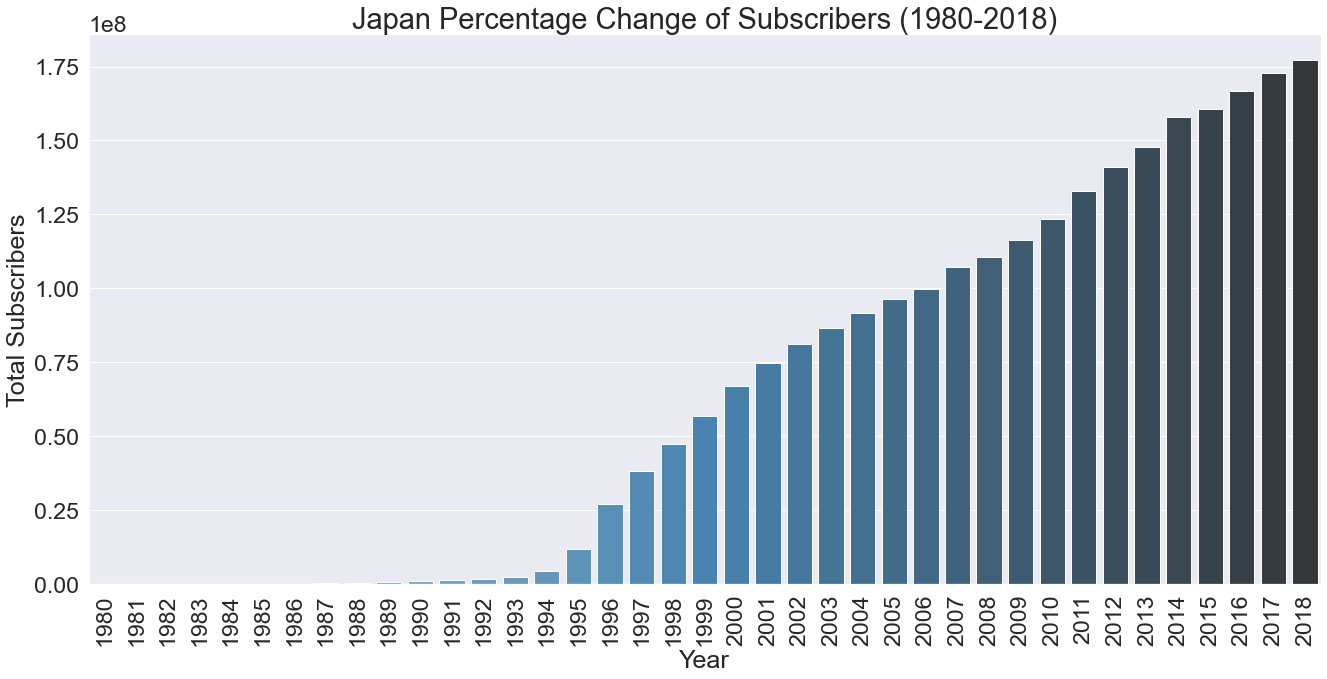

In [79]:
#Plot 'pct_change_year' column
plt.figure(figsize=(19,10))
ax = sns.barplot(x='year', y='total_subscribers', data=jpn_mob_cell_subs_80_18, palette='Blues_d', dodge=False)
ax.set_title('Japan Percentage Change of Subscribers (1980-2018)', fontsize=29)
tick_labels = ax.set_xticklabels(ax.get_xticklabels(which='both'), rotation=90, ha="right")
ax.set(xlabel='Year', ylabel='Total Subscribers')
for x in tick_labels:
    x.set_ha('center')
plt.tight_layout()
plt.show()

In [80]:
#Slice South Korea from index to compare to Japan and model data
kor_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Korea, Rep.'])]
print(kor_mob_cell_subs)

           Country  year  total_subscribers
124    Korea, Rep.  1980                0.0
388    Korea, Rep.  1981                0.0
652    Korea, Rep.  1982                0.0
916    Korea, Rep.  1983                0.0
1180   Korea, Rep.  1984                0.0
1444   Korea, Rep.  1985                0.0
1708   Korea, Rep.  1986             7090.0
1972   Korea, Rep.  1987            10255.0
2236   Korea, Rep.  1988            20353.0
2500   Korea, Rep.  1989            39718.0
2764   Korea, Rep.  1990            80005.0
3028   Korea, Rep.  1991           166108.0
3292   Korea, Rep.  1992           271927.0
3556   Korea, Rep.  1993           471784.0
3820   Korea, Rep.  1994           960258.0
4084   Korea, Rep.  1995          1641290.0
4348   Korea, Rep.  1996          3180990.0
4612   Korea, Rep.  1997          6878790.0
4876   Korea, Rep.  1998         14018600.0
5140   Korea, Rep.  1999         23442700.0
5404   Korea, Rep.  2000         26816400.0
5668   Korea, Rep.  2001        

In [81]:
hkg_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Hong Kong SAR, China'])]
print(hkg_mob_cell_subs)

                    Country  year  total_subscribers
94     Hong Kong SAR, China  1980                0.0
358    Hong Kong SAR, China  1981                0.0
622    Hong Kong SAR, China  1982                0.0
886    Hong Kong SAR, China  1983                0.0
1150   Hong Kong SAR, China  1984             1000.0
1414   Hong Kong SAR, China  1985             4400.0
1678   Hong Kong SAR, China  1986            10000.0
1942   Hong Kong SAR, China  1987            28060.0
2206   Hong Kong SAR, China  1988            51280.0
2470   Hong Kong SAR, China  1989            89193.0
2734   Hong Kong SAR, China  1990           133912.0
2998   Hong Kong SAR, China  1991           189664.0
3262   Hong Kong SAR, China  1992           233324.0
3526   Hong Kong SAR, China  1993           290843.0
3790   Hong Kong SAR, China  1994           484823.0
4054   Hong Kong SAR, China  1995           798373.0
4318   Hong Kong SAR, China  1996          1361860.0
4582   Hong Kong SAR, China  1997          222

In [82]:
ch_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['China'])]
print(ch_mob_cell_subs)

      Country  year  total_subscribers
38      China  1980       0.000000e+00
302     China  1981       0.000000e+00
566     China  1982       0.000000e+00
830     China  1983       0.000000e+00
1094    China  1984       0.000000e+00
1358    China  1985       0.000000e+00
1622    China  1986       0.000000e+00
1886    China  1987       7.000000e+02
2150    China  1988       3.227000e+03
2414    China  1989       9.805000e+03
2678    China  1990       1.831900e+04
2942    China  1991       4.754400e+04
3206    China  1992       1.769430e+05
3470    China  1993       6.380000e+05
3734    China  1994       1.568000e+06
3998    China  1995       3.629000e+06
4262    China  1996       6.853000e+06
4526    China  1997       1.323300e+07
4790    China  1998       2.386300e+07
5054    China  1999       4.329600e+07
5318    China  2000       8.526000e+07
5582    China  2001       1.448200e+08
5846    China  2002       2.060050e+08
6110    China  2003       2.699530e+08
6374    China  2004      

In [83]:
#Slice Indonesia from index
idn_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Indonesia'])]
print(idn_mob_cell_subs)

         Country  year  total_subscribers
104    Indonesia  1980                0.0
368    Indonesia  1981                0.0
632    Indonesia  1982                0.0
896    Indonesia  1983                0.0
1160   Indonesia  1984             1750.0
1424   Indonesia  1985             2029.0
1688   Indonesia  1986             4531.0
1952   Indonesia  1987             6321.0
2216   Indonesia  1988             9008.0
2480   Indonesia  1989            12928.0
2744   Indonesia  1990            18096.0
3008   Indonesia  1991            24528.0
3272   Indonesia  1992            35546.0
3536   Indonesia  1993            53438.0
3800   Indonesia  1994            78024.0
4064   Indonesia  1995           210643.0
4328   Indonesia  1996           562517.0
4592   Indonesia  1997           916173.0
4856   Indonesia  1998          1065820.0
5120   Indonesia  1999          2220970.0
5384   Indonesia  2000          3669330.0
5648   Indonesia  2001          6520950.0
5912   Indonesia  2002         117

In [84]:
#Slice Philippines from index
phl_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Philippines'])]
print(phl_mob_cell_subs)

           Country  year  total_subscribers
185    Philippines  1980                0.0
449    Philippines  1981                0.0
713    Philippines  1982                0.0
977    Philippines  1983                0.0
1241   Philippines  1984                0.0
1505   Philippines  1985                0.0
1769   Philippines  1986                0.0
2033   Philippines  1987                0.0
2297   Philippines  1988                0.0
2561   Philippines  1989                0.0
2825   Philippines  1990                0.0
3089   Philippines  1991            34600.0
3353   Philippines  1992            56044.0
3617   Philippines  1993           102400.0
3881   Philippines  1994           171903.0
4145   Philippines  1995           493862.0
4409   Philippines  1996           959024.0
4673   Philippines  1997          1343620.0
4937   Philippines  1998          1733650.0
5201   Philippines  1999          2849980.0
5465   Philippines  2000          6454360.0
5729   Philippines  2001        

In [85]:
tha_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Thailand'])]
print(tha_mob_cell_subs)

        Country  year  total_subscribers
231    Thailand  1980                0.0
495    Thailand  1981                0.0
759    Thailand  1982                0.0
1023   Thailand  1983                0.0
1287   Thailand  1984                0.0
1551   Thailand  1985                0.0
1815   Thailand  1986              821.0
2079   Thailand  1987             5882.0
2343   Thailand  1988            17563.0
2607   Thailand  1989            39936.0
2871   Thailand  1990            63223.0
3135   Thailand  1991           123551.0
3399   Thailand  1992           250584.0
3663   Thailand  1993           413557.0
3927   Thailand  1994           737283.0
4191   Thailand  1995          1297830.0
4455   Thailand  1996          1844630.0
4719   Thailand  1997          2203910.0
4983   Thailand  1998          1976960.0
5247   Thailand  1999          2339400.0
5511   Thailand  2000          3056000.0
5775   Thailand  2001          7550000.0
6039   Thailand  2002         17449900.0
6303   Thailand 

In [86]:
vnm_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Vietnam'])]
print(vnm_mob_cell_subs)

       Country  year  total_subscribers
255    Vietnam  1980                0.0
519    Vietnam  1981                0.0
783    Vietnam  1982                0.0
1047   Vietnam  1983                0.0
1311   Vietnam  1984                0.0
1575   Vietnam  1985                0.0
1839   Vietnam  1986                0.0
2103   Vietnam  1987                0.0
2367   Vietnam  1988                0.0
2631   Vietnam  1989                0.0
2895   Vietnam  1990                0.0
3159   Vietnam  1991                0.0
3423   Vietnam  1992              800.0
3687   Vietnam  1993             4060.0
3951   Vietnam  1994            12500.0
4215   Vietnam  1995            23500.0
4479   Vietnam  1996            68910.0
4743   Vietnam  1997           160457.0
5007   Vietnam  1998           222700.0
5271   Vietnam  1999           328671.0
5535   Vietnam  2000           788559.0
5799   Vietnam  2001          1251200.0
6063   Vietnam  2002          1902390.0
6327   Vietnam  2003          2742000.0


In [87]:
mys_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Malaysia'])]
print(mys_mob_cell_subs)

        Country  year  total_subscribers
167    Malaysia  1980                0.0
431    Malaysia  1981                0.0
695    Malaysia  1982                0.0
959    Malaysia  1983                0.0
1223   Malaysia  1984                0.0
1487   Malaysia  1985                0.0
1751   Malaysia  1986            10817.0
2015   Malaysia  1987            17411.0
2279   Malaysia  1988            27302.0
2543   Malaysia  1989            39419.0
2807   Malaysia  1990            86620.0
3071   Malaysia  1991           130000.0
3335   Malaysia  1992           200573.0
3599   Malaysia  1993           340022.0
3863   Malaysia  1994           571720.0
4127   Malaysia  1995          1005070.0
4391   Malaysia  1996          1520320.0
4655   Malaysia  1997          2000000.0
4919   Malaysia  1998          2200000.0
5183   Malaysia  1999          2990000.0
5447   Malaysia  2000          5121750.0
5711   Malaysia  2001          7385000.0
5975   Malaysia  2002          9053000.0
6239   Malaysia 

In [88]:
mmr_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Myanmar'])]
print(mmr_mob_cell_subs)

       Country  year  total_subscribers
158    Myanmar  1980                0.0
422    Myanmar  1981                0.0
686    Myanmar  1982                0.0
950    Myanmar  1983                0.0
1214   Myanmar  1984                0.0
1478   Myanmar  1985                0.0
1742   Myanmar  1986                0.0
2006   Myanmar  1987                0.0
2270   Myanmar  1988                0.0
2534   Myanmar  1989                0.0
2798   Myanmar  1990                0.0
3062   Myanmar  1991                0.0
3326   Myanmar  1992                0.0
3590   Myanmar  1993              643.0
3854   Myanmar  1994             1920.0
4118   Myanmar  1995             2766.0
4382   Myanmar  1996             7260.0
4646   Myanmar  1997             8492.0
4910   Myanmar  1998             8516.0
5174   Myanmar  1999            11389.0
5438   Myanmar  2000            13397.0
5702   Myanmar  2001            22671.0
5966   Myanmar  2002            47982.0
6230   Myanmar  2003            66517.0


In [89]:
lao_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge['Country'].isin(['Lao PDR'])]
print(lao_mob_cell_subs)

       Country  year  total_subscribers
127    Lao PDR  1980                0.0
391    Lao PDR  1981                0.0
655    Lao PDR  1982                0.0
919    Lao PDR  1983                0.0
1183   Lao PDR  1984                0.0
1447   Lao PDR  1985                0.0
1711   Lao PDR  1986                0.0
1975   Lao PDR  1987                0.0
2239   Lao PDR  1988                0.0
2503   Lao PDR  1989                0.0
2767   Lao PDR  1990                0.0
3031   Lao PDR  1991                0.0
3295   Lao PDR  1992              290.0
3559   Lao PDR  1993              340.0
3823   Lao PDR  1994              625.0
4087   Lao PDR  1995             1539.0
4351   Lao PDR  1996             3790.0
4615   Lao PDR  1997             4915.0
4879   Lao PDR  1998             6453.0
5143   Lao PDR  1999            12078.0
5407   Lao PDR  2000            12681.0
5671   Lao PDR  2001            29545.0
5935   Lao PDR  2002            55160.0
6199   Lao PDR  2003           112275.0


In [90]:
country6 = [jpn_mob_cell_subs, kor_mob_cell_subs, idn_mob_cell_subs, phl_mob_cell_subs, tha_mob_cell_subs,
      vnm_mob_cell_subs, mys_mob_cell_subs, hkg_mob_cell_subs, ch_mob_cell_subs, mmr_mob_cell_subs, lao_mob_cell_subs]
e_asia_mob_cell_subs = reduce(lambda  left,right: pd.merge(left,right,on=['Country', 'year', 'total_subscribers'],
                                            how='outer'), country6).sort_values('total_subscribers')
print(e_asia_mob_cell_subs)

                  Country  year  total_subscribers
0                   Japan  1980       0.000000e+00
120           Philippines  1980       0.000000e+00
280  Hong Kong SAR, China  1980       0.000000e+00
281  Hong Kong SAR, China  1981       0.000000e+00
282  Hong Kong SAR, China  1982       0.000000e+00
..                    ...   ...                ...
355                 China  2015       1.291980e+09
356                 China  2016       1.364930e+09
357                 China  2017       1.469880e+09
358                 China  2018       1.641150e+09
359                 China  2019       1.725700e+09

[440 rows x 3 columns]


In [91]:
#Drop NaN from 'year' 2020 for coherency of data before train set and test data
e_asia_mob_cell_subs.dropna(subset=['total_subscribers'], inplace=True)
print(e_asia_mob_cell_subs)

                  Country  year  total_subscribers
0                   Japan  1980       0.000000e+00
120           Philippines  1980       0.000000e+00
280  Hong Kong SAR, China  1980       0.000000e+00
281  Hong Kong SAR, China  1981       0.000000e+00
282  Hong Kong SAR, China  1982       0.000000e+00
..                    ...   ...                ...
355                 China  2015       1.291980e+09
356                 China  2016       1.364930e+09
357                 China  2017       1.469880e+09
358                 China  2018       1.641150e+09
359                 China  2019       1.725700e+09

[440 rows x 3 columns]


In [92]:
#Reformat data to wide-form for target and feature for model
e_asia_mob_cell_subs1 = pd.pivot(data=e_asia_mob_cell_subs,index='Country',columns='year',
                                 values='total_subscribers').reset_index()

print(e_asia_mob_cell_subs1)

year               Country  1980     1981     1982     1983     1984     1985  \
0                    China   0.0      0.0      0.0      0.0      0.0      0.0   
1     Hong Kong SAR, China   0.0      0.0      0.0      0.0   1000.0   4400.0   
2                Indonesia   0.0      0.0      0.0      0.0   1750.0   2029.0   
3                    Japan   0.0  13275.0  19804.0  27198.0  40392.0  61800.0   
4              Korea, Rep.   0.0      0.0      0.0      0.0      0.0      0.0   
5                  Lao PDR   0.0      0.0      0.0      0.0      0.0      0.0   
6                 Malaysia   0.0      0.0      0.0      0.0      0.0      0.0   
7                  Myanmar   0.0      0.0      0.0      0.0      0.0      0.0   
8              Philippines   0.0      0.0      0.0      0.0      0.0      0.0   
9                 Thailand   0.0      0.0      0.0      0.0      0.0      0.0   
10                 Vietnam   0.0      0.0      0.0      0.0      0.0      0.0   

year     1986      1987    

In [93]:
#Remove 'year' from index column
e_asia_mob_cell_subs1 = e_asia_mob_cell_subs1.rename_axis(None, axis=1)
print(e_asia_mob_cell_subs1)

                 Country  1980     1981     1982     1983     1984     1985  \
0                  China   0.0      0.0      0.0      0.0      0.0      0.0   
1   Hong Kong SAR, China   0.0      0.0      0.0      0.0   1000.0   4400.0   
2              Indonesia   0.0      0.0      0.0      0.0   1750.0   2029.0   
3                  Japan   0.0  13275.0  19804.0  27198.0  40392.0  61800.0   
4            Korea, Rep.   0.0      0.0      0.0      0.0      0.0      0.0   
5                Lao PDR   0.0      0.0      0.0      0.0      0.0      0.0   
6               Malaysia   0.0      0.0      0.0      0.0      0.0      0.0   
7                Myanmar   0.0      0.0      0.0      0.0      0.0      0.0   
8            Philippines   0.0      0.0      0.0      0.0      0.0      0.0   
9               Thailand   0.0      0.0      0.0      0.0      0.0      0.0   
10               Vietnam   0.0      0.0      0.0      0.0      0.0      0.0   

       1986      1987      1988      1989      1990

In [96]:
#Check dtypes
print(e_asia_mob_cell_subs1.dtypes)

Country     object
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
dtype: object


In [97]:
#Identify outliers using InterQuartile Range (IQR)
Q1 = e_asia_mob_cell_subs1.quantile(0.25)
Q3 = e_asia_mob_cell_subs1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1980            0.0
1981            0.0
1982            0.0
1983            0.0
1984          500.0
1985         1014.5
1986         8545.0
1987        13833.0
1988        23827.5
1989        39827.0
1990        83312.5
1991       135790.0
1992       223781.0
1993       413921.5
1994       803508.5
1995      1352488.5
1996      2197096.5
1997      4016010.0
1998      7952225.0
1999     12584054.5
2000     14713100.5
2001     17088620.0
2002     20747140.0
2003     23005100.0
2004     28174020.0
2005     33557420.0
2006     39167630.0
2007     58316550.0
2008     72987100.0
2009     85888900.0
2010     93602300.0
2011    104062400.0
2012    107545400.0
2013    105822950.0
2014    110023550.0
2015     97893150.0
2016     96700800.0
2017    102017400.0
2018    107074300.0
2019    119321800.0
dtype: float64


In [98]:
#Find lower bound for IQR
low_iqr = Q1*1.5
print(low_iqr)

1980           0.00
1981           0.00
1982           0.00
1983           0.00
1984           0.00
1985           0.00
1986           0.00
1987           0.00
1988           0.00
1989           0.00
1990           0.00
1991       18396.00
1992       27259.50
1993       43123.50
1994       67893.00
1995      175607.25
1996      473570.25
1997      807472.50
1998      966390.00
1999     1912230.75
2000     2883419.25
2001     5270670.00
2002     6223590.00
2003     7568400.00
2004     9880470.00
2005    13603095.00
2006    21252480.00
2007    25573950.00
2008    29469825.00
2009    32055900.00
2010    35739300.00
2011    38965650.00
2012    43284150.00
2013    44983575.00
2014    55468425.00
2015    63823275.00
2016    70538550.00
2017    67713900.00
2018    77668050.00
2019    79309050.00
Name: 0.25, dtype: float64


In [99]:
#Find upper bound for IQR
high_iqr = Q3*1.5
print(high_iqr)

1980    0.000000e+00
1981    0.000000e+00
1982    0.000000e+00
1983    0.000000e+00
1984    7.500000e+02
1985    1.521750e+03
1986    1.281750e+04
1987    2.074950e+04
1988    3.574125e+04
1989    5.974050e+04
1990    1.249688e+05
1991    2.220810e+05
1992    3.629310e+05
1993    6.640058e+05
1994    1.273156e+06
1995    2.204340e+06
1996    3.769215e+06
1997    6.831488e+06
1998    1.289473e+07
1999    2.078831e+07
2000    2.495307e+07
2001    3.090360e+07
2002    3.734430e+07
2003    4.207605e+07
2004    5.214150e+07
2005    6.393922e+07
2006    8.000392e+07
2007    1.130488e+08
2008    1.389505e+08
2009    1.608892e+08
2010    1.761428e+08
2011    1.950592e+08
2012    2.046022e+08
2013    2.037180e+08
2014    2.205038e+08
2015    2.106630e+08
2016    2.155898e+08
2017    2.207400e+08
2018    2.382795e+08
2019    2.582918e+08
Name: 0.75, dtype: float64


In [100]:
#Print True and False values to find outliers
tru_fals_outliers = (e_asia_mob_cell_subs1 < (Q1-1.5*IQR)) | (e_asia_mob_cell_subs1 > (Q3+1.5*IQR))
print(tru_fals_outliers)

     1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
0   False  False  False  False  False  False  False  False  False  False   
1   False  False  False  False  False   True  False  False  False  False   
2   False  False  False  False   True  False  False  False  False  False   
3   False   True   True   True   True   True   True   True   True   True   
4   False  False  False  False  False  False  False  False  False  False   
5   False  False  False  False  False  False  False  False  False  False   
6   False  False  False  False  False  False  False  False  False  False   
7   False  False  False  False  False  False  False  False  False  False   
8   False  False  False  False  False  False  False  False  False  False   
9   False  False  False  False  False  False  False  False  False  False   
10  False  False  False  False  False  False  False  False  False  False   

     1990   1991   1992   1993   1994   1995   1996   1997   1998   1999  \
0   False  

<ipython-input-100-9e9745ffa5fb>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  tru_fals_outliers = (e_asia_mob_cell_subs1 < (Q1-1.5*IQR)) | (e_asia_mob_cell_subs1 > (Q3+1.5*IQR))
<ipython-input-100-9e9745ffa5fb>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  tru_fals_outliers = (e_asia_mob_cell_subs1 < (Q1-1.5*IQR)) | (e_asia_mob_cell_subs1 > (Q3+1.5*IQR))


In [101]:
#Turn DataFrame from wide-form to long-form
e_asia_iqr_boxplot = e_asia_mob_cell_subs1.melt(id_vars=['Country'], var_name='year', 
                                                value_name='total_subscribers')
print(e_asia_iqr_boxplot)

                  Country  year  total_subscribers
0                   China  1980                0.0
1    Hong Kong SAR, China  1980                0.0
2               Indonesia  1980                0.0
3                   Japan  1980                0.0
4             Korea, Rep.  1980                0.0
..                    ...   ...                ...
435              Malaysia  2019         44601400.0
436               Myanmar  2019         61144000.0
437           Philippines  2019        167322000.0
438              Thailand  2019        129614000.0
439               Vietnam  2019        136230000.0

[440 rows x 3 columns]


In [102]:
#Select 'year' when most countries had some subscribers
iqr_93_19 = e_asia_iqr_boxplot[e_asia_iqr_boxplot['year'].astype(int)>1992]
print(iqr_93_19)

                  Country  year  total_subscribers
143                 China  1993           638000.0
144  Hong Kong SAR, China  1993           290843.0
145             Indonesia  1993            53438.0
146                 Japan  1993          2131370.0
147           Korea, Rep.  1993           471784.0
..                    ...   ...                ...
435              Malaysia  2019         44601400.0
436               Myanmar  2019         61144000.0
437           Philippines  2019        167322000.0
438              Thailand  2019        129614000.0
439               Vietnam  2019        136230000.0

[297 rows x 3 columns]


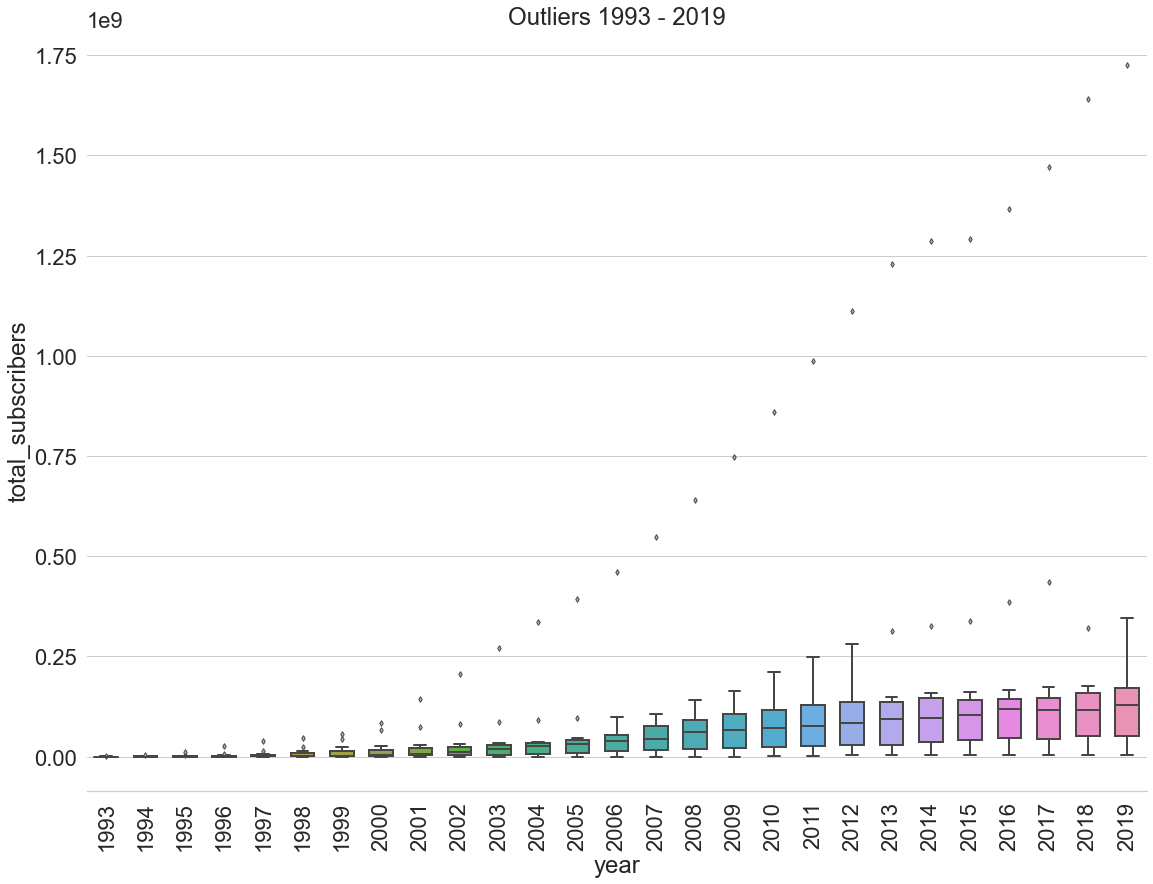

In [103]:
#Plot Outliers using Boxplot
flierprops = dict(markerfacecolor='0.70', markersize=4,
              linestyle='none')
ax = sns.set(rc={'figure.figsize':(19,14)}, font_scale=2.0, style='whitegrid')
ax = sns.boxplot(x="year", y="total_subscribers", data=iqr_93_19, width=0.6, dodge=False, 
                 linewidth=2.0, flierprops=flierprops)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Outliers 1993 - 2019')
sns.despine(left=True)
plt.show()

In [104]:
#Convert 'Country' column to categorical variable
labelencoder= LabelEncoder()
e_asia_mob_cell_subs1['Country'] = labelencoder.fit_transform(e_asia_mob_cell_subs1['Country'])
print(e_asia_mob_cell_subs1)

    Country  1980     1981     1982     1983     1984     1985     1986  \
0         0   0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         1   0.0      0.0      0.0      0.0   1000.0   4400.0  10000.0   
2         2   0.0      0.0      0.0      0.0   1750.0   2029.0   4531.0   
3         3   0.0  13275.0  19804.0  27198.0  40392.0  61800.0  95131.0   
4         4   0.0      0.0      0.0      0.0      0.0      0.0   7090.0   
5         5   0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6         6   0.0      0.0      0.0      0.0      0.0      0.0  10817.0   
7         7   0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8         8   0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9         9   0.0      0.0      0.0      0.0      0.0      0.0    821.0   
10       10   0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        1987      1988      1989      1990       1991       1992       1993  \
0      700.0    3227

In [105]:
#Split data into train and test sets
X1 = e_asia_mob_cell_subs1.iloc[0:, 1:40]
y1 = e_asia_mob_cell_subs1['2019']

In [106]:
#Get shape for X1, y1
print(X1.shape, y1.shape)

(11, 39) (11,)


In [107]:
#Validate data
cv = LeaveOneOut()
regressor = LinearRegression()
scores = cross_val_score(regressor, X1, y1, cv=len(X1), n_jobs=-1, scoring='neg_mean_absolute_error')
print(scores)

[-3.31829510e+08 -2.45874626e+06 -1.88589354e+08 -3.33103164e+05
 -1.94865806e+07 -5.99132445e+05 -1.93707842e+07 -3.64008663e+07
 -4.86842382e+07 -4.97063173e+07 -8.97838047e+07]


In [108]:
#Get square root
sqrt(mean(absolute(scores)))

8459.757345998503

In [109]:
#Split data into 70:30 ratio
X_train, X_test, y_train, y_test, = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [137]:
#Create baseline predictions for mean
base_med = DummyRegressor(strategy='mean')
base_med.fit(X_train, y_train)

DummyRegressor()

In [138]:
#Predict baseline median
y_pred_base_med = base_med.predict(X_test)
print(y_pred_base_med)

[1.26501086e+08 1.26501086e+08 1.26501086e+08 1.26501086e+08]


In [112]:
#Fit multiple linear regression model to training data set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [113]:
#Get slope of model
#coeff = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])
print(regressor.coef_)

[-2.54241073e-14  3.58257086e-04  5.34457502e-04  7.34001976e-04
  1.57749906e-03  3.91170193e-03  6.17751072e-05  6.39399953e-03
  1.34592064e-02  2.97543630e-02  2.86965796e-02  4.21372718e-02
  2.18889717e-02 -3.73707413e-02 -6.53772020e-02  1.95717565e-02
  3.19138397e-01  4.08006591e-01  2.27835558e-01 -3.46254521e-01
 -3.49472032e-01 -2.87182485e-01 -5.36973439e-01  3.04084236e-01
  7.09485241e-01 -2.10686971e+00 -2.93032061e-02  9.75452563e-01
  4.49246466e-01  7.70657189e-01 -4.86521013e-02  1.05898368e+00
  1.01933350e-01 -1.01530722e+00 -1.02576216e+00  2.66384960e-01
  4.54812446e-01 -4.04353116e-01  1.33203240e+00]


In [114]:
#Get intercept of model
print(regressor.intercept_)

-364543.4069632739


In [115]:
#Predict model
y_pred_test = regressor.predict(X_test)
print(y_pred_test)

[5.99845270e+06 1.79620155e+09 1.70419890e+08 2.38088229e+08]


In [116]:
#Get accuracy of model
score = regressor.score(X_test, y_test)
print(score)

0.9915671365065387


In [117]:
#Create column based on stacked prediction
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
e_asia_mob_cell_subs1['Predicted'] = np.hstack([y_pred_train, y_pred_test])
print(e_asia_mob_cell_subs1[['Country', '2019', 'Predicted']])

    Country          2019     Predicted
0         0  1.725700e+09  3.450250e+08
1         1  2.145570e+07  2.145570e+07
2         2  3.450250e+08  1.673220e+08
3         3  1.770670e+08  6.889250e+07
4         4  6.889250e+07  6.114400e+07
5         5  4.362180e+06  1.770670e+08
6         6  4.460140e+07  4.460140e+07
7         7  6.114400e+07  5.998453e+06
8         8  1.673220e+08  1.796202e+09
9         9  1.296140e+08  1.704199e+08
10       10  1.362300e+08  2.380882e+08


<AxesSubplot:xlabel='Country', ylabel='2019'>

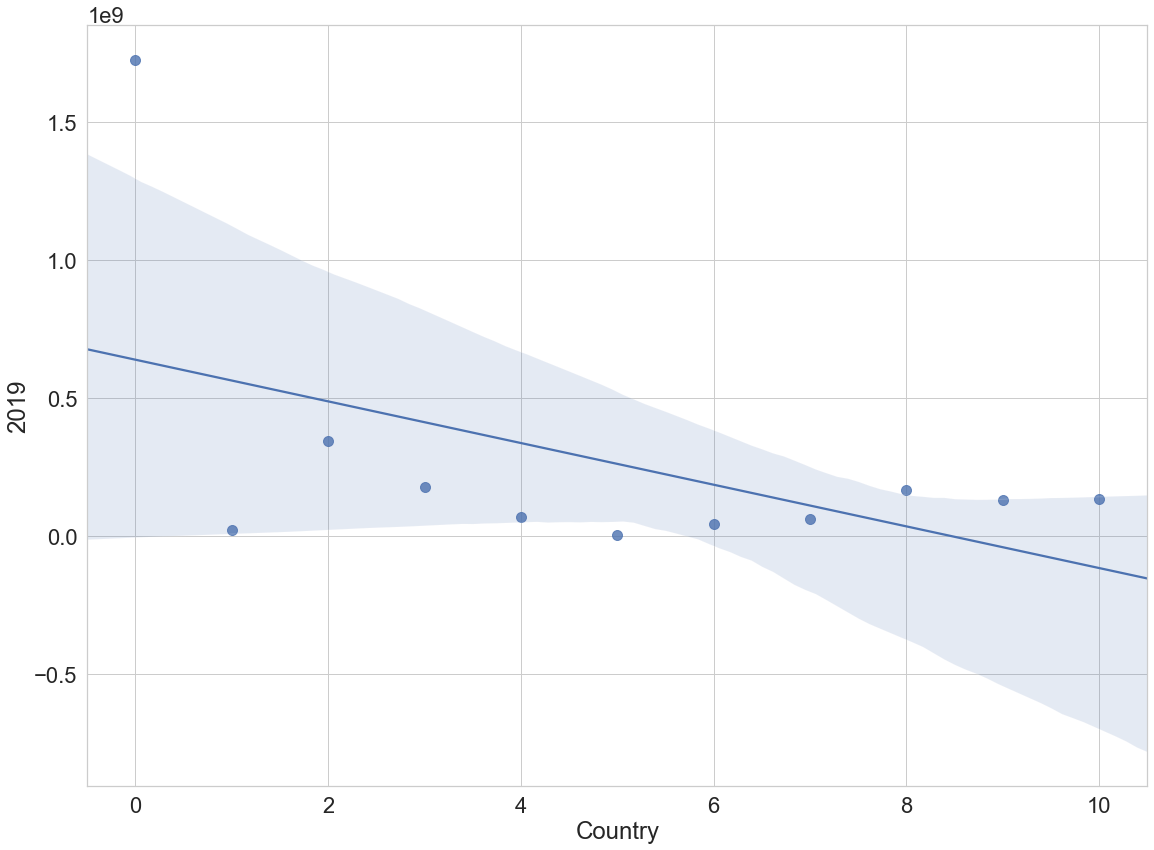

In [118]:
#Create linear model plot using seaborn lmplot/regplot for east asia data
sns.set_style('whitegrid')
sns.regplot(x = 'Country', y = '2019', data = e_asia_mob_cell_subs1, 
           fit_reg=True, 
                truncate=False, scatter_kws={"s": 100})

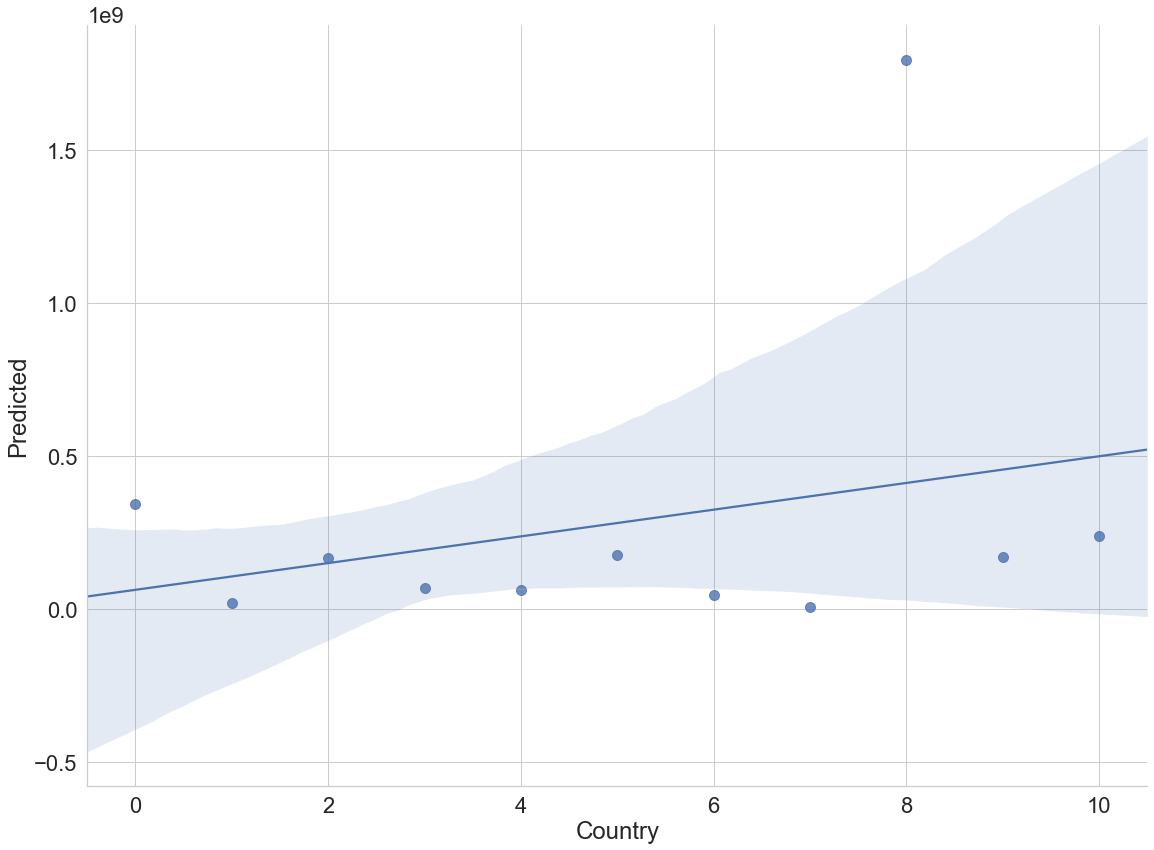

In [119]:
#Plot regression for predictions using seaborn
#reg_plot = pd.DataFrame({'y_test':y_test, 'Predicted': y_pred_test})
sns.set_style('whitegrid')
g = sns.regplot(x='Country', y='Predicted', data=e_asia_mob_cell_subs1, fit_reg=True, 
                truncate=False, scatter_kws={"s": 100});
sns.despine(left=False)

In [120]:
#Filter Western Countries with high population
us_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                              ['Country'].isin(['United States'])]
braz_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Brazil'])]
mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Mexico'])]
grmn_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Germany'])]
uk_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['United Kingdom'])]
fra_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['France'])]
it_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Italy'])]
co_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Colombia'])]
es_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Spain'])]
ar_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Argentina'])]
ca_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Canada'])]
pl_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Poland'])]
pe_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Peru'])]
aus_mob_cell_subs = mex_mob_cell_subs = mobile_cell_subs_merge.loc[mobile_cell_subs_merge
                                               ['Country'].isin(['Australia'])]

In [121]:
west_countries = [us_mob_cell_subs, braz_mob_cell_subs, mex_mob_cell_subs, grmn_mob_cell_subs, 
                 uk_mob_cell_subs, fra_mob_cell_subs, it_mob_cell_subs, co_mob_cell_subs, 
                 es_mob_cell_subs, ar_mob_cell_subs, ca_mob_cell_subs, pl_mob_cell_subs, 
                 pe_mob_cell_subs, aus_mob_cell_subs]
west_mob_cell_subs = reduce(lambda  left,right: pd.merge(left,right,on=['Country', 'year', 'total_subscribers'],
                                            how='outer'), west_countries).sort_values('total_subscribers')

#Drop NAs from 'total_subscribers' column
west_mob_cell_subs.dropna(subset=['total_subscribers'], inplace=True)

print(west_mob_cell_subs)

            Country  year  total_subscribers
0     United States  1980                0.0
442          Poland  1982                0.0
441          Poland  1981                0.0
440          Poland  1980                0.0
160  United Kingdom  1980                0.0
..              ...   ...                ...
35    United States  2015        382307000.0
36    United States  2016        395881000.0
37    United States  2017        400206000.0
38    United States  2018        404577000.0
39    United States  2019        404577000.0

[520 rows x 3 columns]


In [122]:
#Select 'year' when most countries had some subscribers
west_cell_subs_94_19 = west_mob_cell_subs[west_mob_cell_subs['year'].astype(int)>1993]
print(west_cell_subs_94_19)

           Country  year  total_subscribers
454         Poland  1994            38942.0
494           Peru  1994            52200.0
495           Peru  1995            73543.0
455         Poland  1995            75000.0
294       Colombia  1994            86805.0
..             ...   ...                ...
35   United States  2015        382307000.0
36   United States  2016        395881000.0
37   United States  2017        400206000.0
38   United States  2018        404577000.0
39   United States  2019        404577000.0

[338 rows x 3 columns]


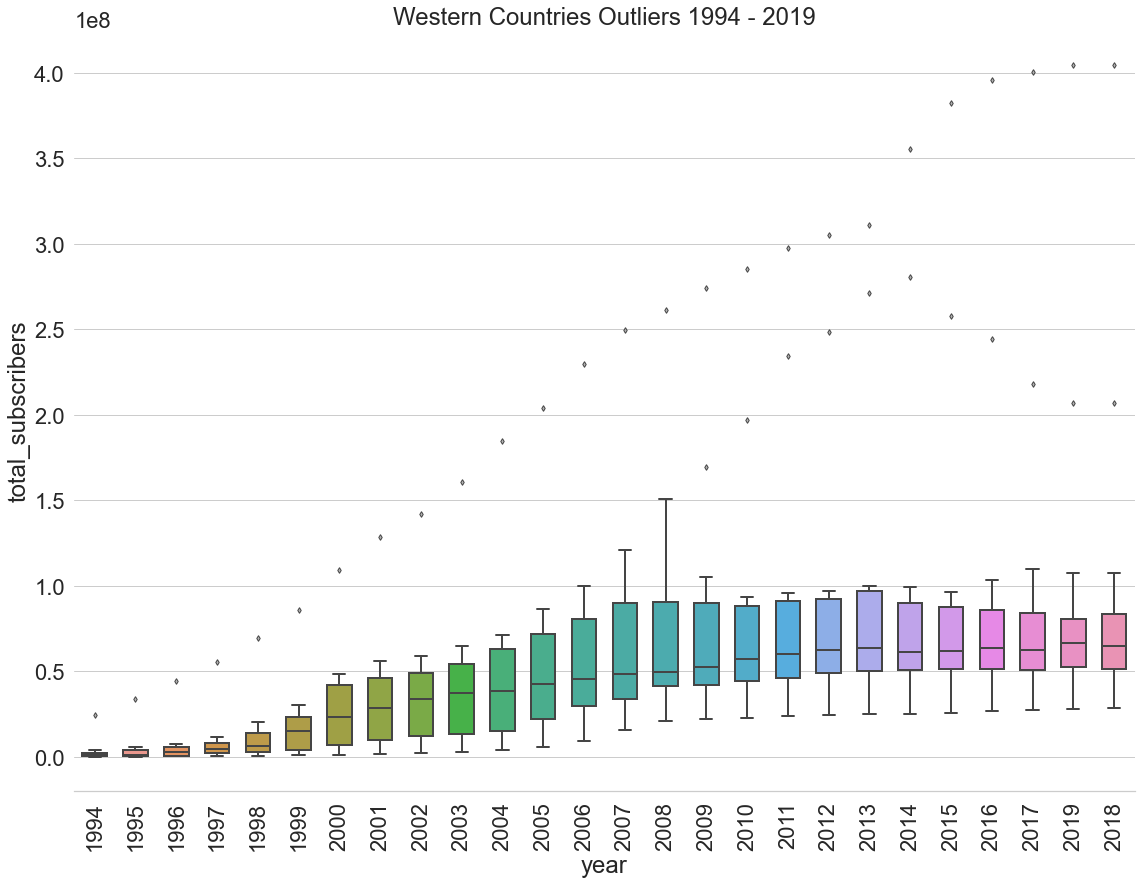

In [123]:
#Plot Outliers using Boxplot
flierprops = dict(markerfacecolor='0.70', markersize=4,
              linestyle='none')
ax = sns.set(rc={'figure.figsize':(19,14)}, font_scale=2.0, style='whitegrid')
ax = sns.boxplot(x="year", y="total_subscribers", data=west_cell_subs_94_19, width=0.6, dodge=False, 
                 linewidth=2.0, flierprops=flierprops)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Western Countries Outliers 1994 - 2019')
sns.despine(left=True)
plt.show()

In [124]:
#Reshape data to wide-form data
west_mob_cell_subs1 = pd.pivot(data=west_mob_cell_subs,index='Country',columns='year',
                                 values='total_subscribers').reset_index()

#Remove 'year' from index column
west_mob_cell_subs1 = west_mob_cell_subs1.rename_axis(None, axis=1)
print(west_mob_cell_subs1)

           Country  1980  1981  1982  1983     1984      1985      1986  \
0        Argentina   0.0   0.0   0.0   0.0      0.0       0.0       0.0   
1        Australia   0.0   0.0   0.0   0.0      0.0       0.0       0.0   
2           Brazil   0.0   0.0   0.0   0.0      0.0       0.0       0.0   
3           Canada   0.0   0.0   0.0   0.0      0.0   12000.0   60000.0   
4         Colombia   0.0   0.0   0.0   0.0      0.0       0.0       0.0   
5           France   0.0   0.0   0.0   0.0      0.0       0.0    9055.0   
6          Germany   0.0   0.0   0.0   0.0      0.0    1080.0   23800.0   
7            Italy   0.0   0.0   0.0   0.0      0.0    6415.0    9044.0   
8             Peru   0.0   0.0   0.0   0.0      0.0       0.0       0.0   
9           Poland   0.0   0.0   0.0   0.0      0.0       0.0       0.0   
10           Spain   0.0   0.0   0.0   0.0      0.0       0.0    1700.0   
11  United Kingdom   0.0   0.0   0.0   0.0      0.0   50000.0  130000.0   
12   United States   0.0 

In [125]:
#Convert 'Country' column to categorical variable
labelencoder= LabelEncoder()
west_mob_cell_subs1['Country'] = labelencoder.fit_transform(west_mob_cell_subs1['Country'])
print(west_mob_cell_subs1)

    Country  1980  1981  1982  1983     1984      1985      1986       1987  \
0         0   0.0   0.0   0.0   0.0      0.0       0.0       0.0        0.0   
1         1   0.0   0.0   0.0   0.0      0.0       0.0       0.0     4423.0   
2         2   0.0   0.0   0.0   0.0      0.0       0.0       0.0        0.0   
3         3   0.0   0.0   0.0   0.0      0.0   12000.0   60000.0    98364.0   
4         4   0.0   0.0   0.0   0.0      0.0       0.0       0.0        0.0   
5         5   0.0   0.0   0.0   0.0      0.0       0.0    9055.0    39234.0   
6         6   0.0   0.0   0.0   0.0      0.0    1080.0   23800.0    48747.0   
7         7   0.0   0.0   0.0   0.0      0.0    6415.0    9044.0    16534.0   
8         8   0.0   0.0   0.0   0.0      0.0       0.0       0.0        0.0   
9         9   0.0   0.0   0.0   0.0      0.0       0.0       0.0        0.0   
10       10   0.0   0.0   0.0   0.0      0.0       0.0    1700.0     4200.0   
11       11   0.0   0.0   0.0   0.0      0.0   50000

In [126]:
#Separate feature and target variables fro train and test
X2 = west_mob_cell_subs1.iloc[0:, 1:40]
y2 = west_mob_cell_subs1['2019']

In [127]:
#Validate data
cv = LeaveOneOut()
lr = LinearRegression()
scores1 = cross_val_score(lr, X2, y2, cv=len(X2), n_jobs=-1, scoring ='neg_mean_absolute_error')
scores1

array([   -82481.15416557,  -2740898.05583773, -12025052.0436582 ,
        -2472514.91170541,  -1053187.8517882 ,  -1743949.43051213,
        -7464730.87647028,  -1139335.81351683,  -3355058.3112918 ,
         -851366.76276833,  -2488974.85574519,  -3776919.799054  ,
        -2893427.7478652 ])

In [128]:
#Split data into 70:30 ratio
X2_train, X2_test, y2_train, y2_test, = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [129]:
#Fit linear regression model to training data set as 'lr'
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
#Get slope of model
#coeff1 = pd.DataFrame(regressor.coef_, X2.columns, columns=['Coefficient'])
print(lr.coef_)

[-2.54241073e-14  3.58257086e-04  5.34457502e-04  7.34001976e-04
  1.57749906e-03  3.91170193e-03  6.17751072e-05  6.39399953e-03
  1.34592064e-02  2.97543630e-02  2.86965796e-02  4.21372718e-02
  2.18889717e-02 -3.73707413e-02 -6.53772020e-02  1.95717565e-02
  3.19138397e-01  4.08006591e-01  2.27835558e-01 -3.46254521e-01
 -3.49472032e-01 -2.87182485e-01 -5.36973439e-01  3.04084236e-01
  7.09485241e-01 -2.10686971e+00 -2.93032061e-02  9.75452563e-01
  4.49246466e-01  7.70657189e-01 -4.86521013e-02  1.05898368e+00
  1.01933350e-01 -1.01530722e+00 -1.02576216e+00  2.66384960e-01
  4.54812446e-01 -4.04353116e-01  1.33203240e+00]


In [131]:
#Get intercept of model
#intercept1 = pd.DataFrame(regressor.intercept_, X2.columns, columns=['Intercept'])
print(lr.intercept_)

-364543.4069632739


In [132]:
#Predict model
y_pred_test1 = lr.predict(X2_test)
print(y_pred_test1)

[83770721.21695074 66625085.65738054 92682761.18976347 67762506.51689112]


In [133]:
#Get accuracy of model
score = lr.score(X2_test, y2_test)
print(score)

-1.6699984402514665


In [134]:
#Create column based on stacked prediction for West Countries
y_pred_train1 = lr.predict(X2_train)
y_pred_test1 = lr.predict(X2_test)
west_mob_cell_subs1['Predicted'] = np.hstack([y_pred_train1, y_pred_test1])
print(west_mob_cell_subs1[['Country', '2019', 'Predicted']])

    Country         2019     Predicted
0         0   58606400.0  7.246106e+07
1         1   27880000.0  2.238900e+08
2         2  207047000.0  3.419482e+07
3         3   34615000.0  4.973018e+08
4         4   66283200.0  8.906713e+07
5         5   72043000.0  1.043890e+08
6         6  107200000.0  6.311373e+07
7         7   80580500.0  3.995610e+07
8         8   38915400.0  1.272590e+08
9         9   52268100.0  8.377072e+07
10       10   55267600.0  6.662509e+07
11       11   78924300.0  9.268276e+07
12       12  404577000.0  6.776251e+07


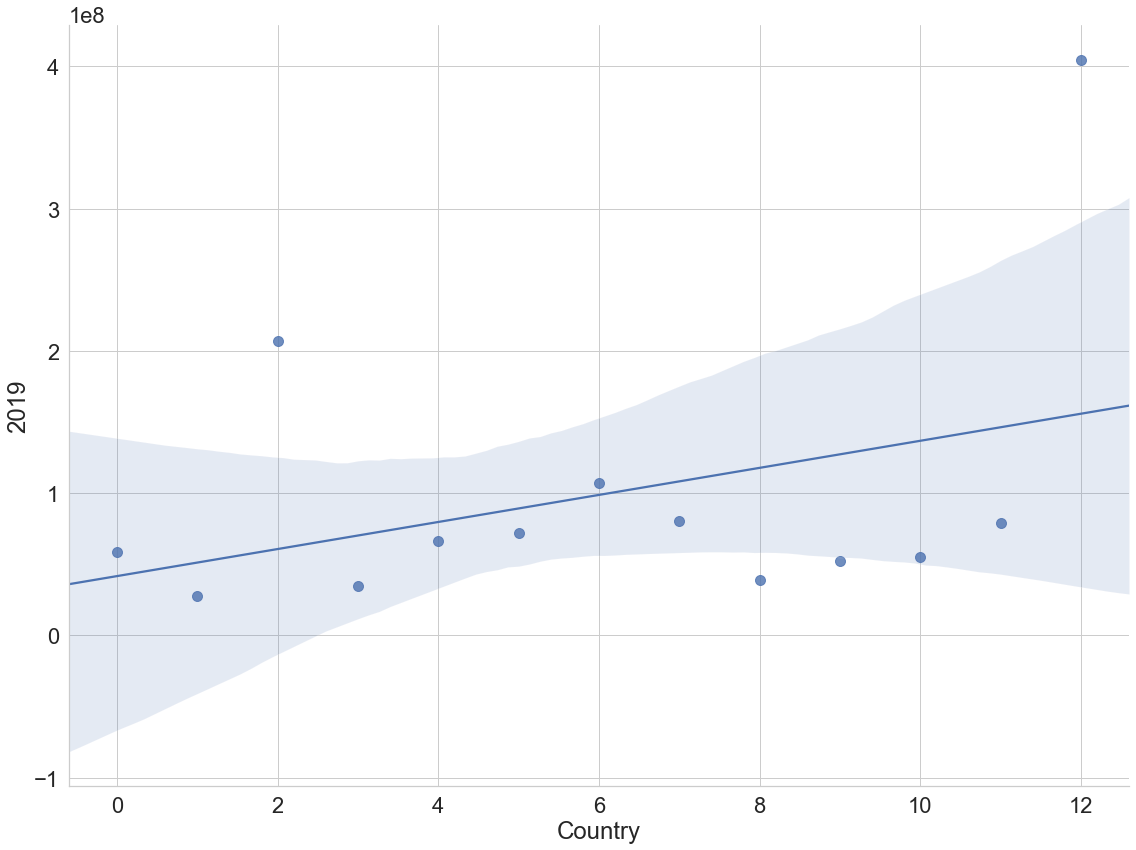

In [135]:
#Create linear model plot using seaborn lmplot/regplot for western countries data
sns.set_style('whitegrid')
sns.regplot(x = 'Country', y = '2019', data = west_mob_cell_subs1, 
           fit_reg=True, 
                truncate=False, scatter_kws={"s": 100})
sns.despine(left=False)

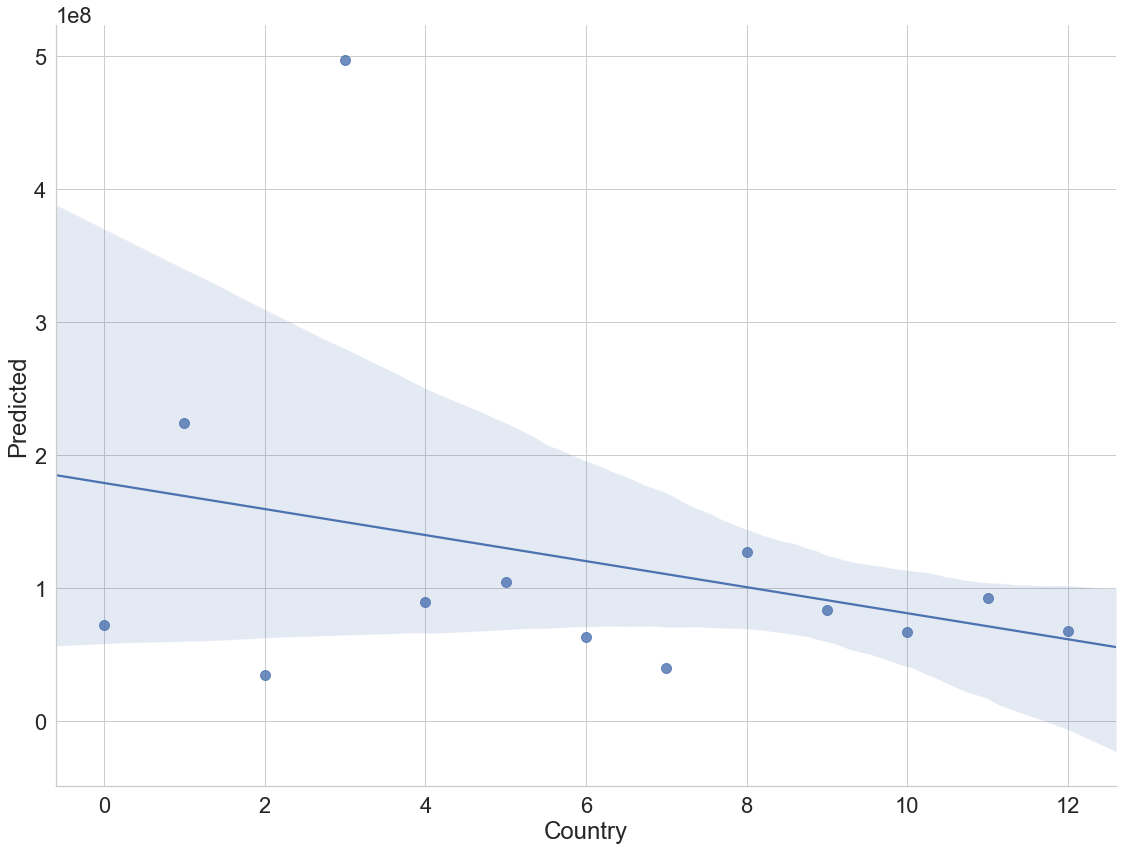

In [136]:
#Plot regression for first predictions using seaborn
#reg_plot = pd.DataFrame({'y_test':y_test, 'Predicted': y_pred_test})
sns.set_style('whitegrid')
sns.regplot(x='Country', y='Predicted', data=west_mob_cell_subs1, fit_reg=True, 
                truncate=False, scatter_kws={'s': 100});
sns.despine(left=False)